<a href="https://colab.research.google.com/github/fisicadeparticulas/20210915_procesamientodearchivoslhe-alancovamo/blob/main/FiscPart_02_04_MadgraphEvents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesando el archivo de salida de MadGraph en formato LHE usando bash.

Usamos bash/shell para extraer los renglones que nos interesan del archivo "*.lhe", recuede que es posible que los archivos creados se borren cuando sale de la rutina. 

In [94]:
%shell
!cat /content/drive/MyDrive/unweighted_events.lhe | grep "13  " | awk '{print $7", "$8", "$9", "$10}' > /content/drive/MyDrive/eventos_pxpypzE.csv


# Plot the cuadri-vectores generados por MadGraph



Usamos python para gráficar el contenido del archivo cvs generado en el paso anterior.

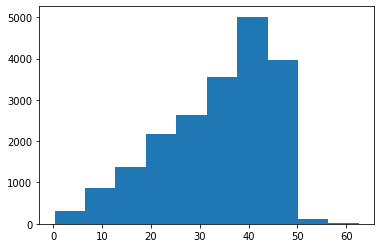

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

events=pd.read_csv("/content/drive/MyDrive/eventos_pxpypzE.csv") 
events.head()

data = np.genfromtxt("/content/drive/MyDrive/eventos_pxpypzE.csv", delimiter=", ", names=["px","py","pz","E"] )
#plt.plot(data['px'])
#plt.hist(data['px'])
#momento transverso
plt.hist(np.sqrt(data['px']*data['px']+data['py']*data['py']))
#momento 
#plt.hist(np.sqrt(data['px']*data['px']+data['py']*data['py']+data['pz']*data['pz']))
plt.show()

# Generar el archivo que pone en un solo renglón la información de los dos muones.

Usamos python para leer el archivo csv generado en el primer paso y crear un archivo que ponga en un solo renglón los datos de los dos muones en cada evento. Note que: se podría graficar directamente sin necesidad de crear el archivo. 

**¡Por favor revise que los datos se están guardando correctamente!** es 

---

posible que el código necesite algunos ajustes. 

In [102]:
"""
Created on Wed Sep 15 17:01:01 2021
@author: alancovamo/fisicaparticulas
modified by isapedraza on September 17 : adding the file saving on drive. 
"""
import pandas as pd
import csv
import numpy as np      
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#montamos los datos a la memoria
df = pd.read_table('/content/drive/MyDrive/eventos_pxpypzE.csv',delimiter=',',header=None,dtype=np.float64)

#localiza los renglones pares del arreglo df.
df_1=df.iloc[lambda x: x.index % 2 == 0]
#reinicia el indice del arreglo con los renglones pares del archivo original
df_1=df_1.reset_index(drop=True)

#localizar los renglones impares
df_2=df.iloc[lambda x: x.index % 2 != 0]
#reinicia el indice del arreglo  con los renglones impares del archivo original
df_2=df_2.reset_index(drop=True)


df_1.rename(columns= {df_1.columns[0]: 'px',
                      df_1.columns[1]: 'py',
                      df_1.columns[2]: 'pz',
                      df_1.columns[3]: 'E'}, inplace=True)
df_2.rename(columns= {df_2.columns[0]: 'px*',
                      df_2.columns[1]: 'py*',
                      df_2.columns[2]: 'pz*',
                      df_2.columns[3]: 'E*'}, inplace=True)


df_3=df_1.join(df_2)
print(df_3.head())

df_3.to_csv('/content/drive/MyDrive/mumu.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          px         py          pz  ...        py*         pz*          E*
0 -25.416007  35.010752   86.334113  ... -35.010752   39.850978   58.820291
1  15.612459 -33.486087   15.291070  ...  33.486087  102.211484  108.684196
2 -12.683705  15.981324  111.997587  ... -15.981324  -11.016872   23.187293
3  13.174934  42.043646  -19.199519  ... -42.043646  -42.374808   61.129955
4 -37.019273  -4.414691   77.437419  ...   4.414691  156.310601  160.695115

[5 rows x 8 columns]


# Distribucion de momento transverso


(array([ 149.,  429.,  687., 1085., 1313., 1780., 2507., 1984.,   56.,
          10.]),
 array([ 0.30141045,  6.52744708, 12.75348371, 18.97952034, 25.20555697,
        31.4315936 , 37.65763023, 43.88366686, 50.10970349, 56.33574012,
        62.56177675]),
 <a list of 10 Patch objects>)

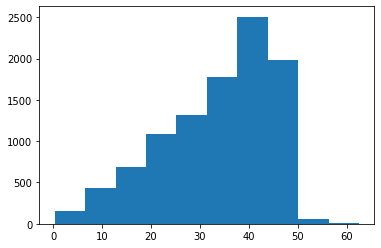

In [113]:
df = pd.read_table('/content/drive/MyDrive/mumu.csv',delimiter=',',index_col=0,dtype=np.float64)

p_transv = np.sqrt(df['px']**2+df['py']**2)

plt.hist(p_transv)

# Gráfica de la masa invariante de la suma de los cuadrivetores de los dos muones del evento. 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1944.,  319.,   69.,   68.,   71.,   59.,   32.,   12.,   11.,
           8.]),
 array([7.60975927e-05, 2.76799420e-03, 5.45989080e-03, 8.15178741e-03,
        1.08436840e-02, 1.35355806e-02, 1.62274772e-02, 1.89193738e-02,
        2.16112704e-02, 2.43031670e-02, 2.69950637e-02]),
 <a list of 10 Patch objects>)

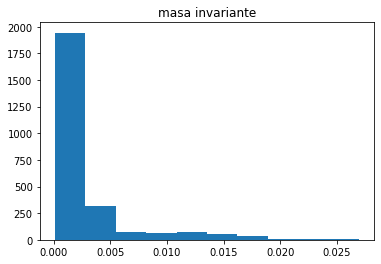

In [114]:
df = pd.read_table('/content/drive/MyDrive/mumu.csv',delimiter=',',index_col=0,dtype=np.float64)
p_1=np.sqrt(df['E']**2-df['px']**2-df['py']**2-df['pz']**2)
p_2=np.sqrt(df_3['E*']**2-(df_3['px*']**2+df_3['py*']**2+df_3['pz*']**2))
p_net=p_1+p_2

plt.title('masa invariante')
plt.hist(p_net)
